In [1]:
import os
from pymatgen.core import Structure
from pathlib import Path
import pandas as pd
import sys

sys.path.append("../../")
from utils.save_and_load import save_to_json, load_from_json

In [6]:
max_abs_shg_dir = '../../gnn_cmp/SHG-GIN/data/nlo/'
if 'id_prop.csv' not in os.listdir(max_abs_shg_dir):
    raise FileNotFoundError('id_prop.csv not found')
data_csv = pd.read_csv(
    Path(max_abs_shg_dir)/'id_prop.csv',
    names=[
        "cif_id",
        "label",
        "gap_",
        "gap0",
        "gap1",
        "gap2",
        "gap3",
        "gap4",
        "gap5",
        "gap6",
        "gap7",
        "gap8",
        "gap9",
    ],
)

In [7]:
shg_dict = {}
for filename in os.listdir(max_abs_shg_dir):
    if filename.endswith(".cif"):
        key = filename.removesuffix(".cif")
        shg_dict[key] = dict(
            structure=Structure.from_file(
                str(Path(max_abs_shg_dir) / filename)
            ).as_dict(),
            shg=data_csv.loc[data_csv["cif_id"] == key, "label"].values[0],
        )
len(shg_dict)

/home/xormap/miniconda3/envs/sevennet/lib/python3.10/site-packages/pymatgen/core/structure.py:3175: EncodingWarning: We strongly encourage explicit `encoding`, and we would use UTF-8 by default as per PEP 686
  with zopen(filename, mode="rt", errors="replace") as file:
/home/xormap/miniconda3/envs/sevennet/lib/python3.10/site-packages/pymatgen/core/structure.py:3175: EncodingWarning: We strongly encourage explicit `encoding`, and we would use UTF-8 by default as per PEP 686
  with zopen(filename, mode="rt", errors="replace") as file:
/home/xormap/miniconda3/envs/sevennet/lib/python3.10/site-packages/pymatgen/io/cif.py:1324: UserWarning: Issues encountered while parsing CIF: 12 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/home/xormap/miniconda3/envs/sevennet/lib/python3.10/site-packages/pymatgen/io/cif.py:1324: UserWarning: Issues encountered while parsing CIF: 

522

In [8]:
save_to_json(shg_dict, "../final_data/dataset_of_max_abs_shg.json")

In [2]:
shg_dict = load_from_json("../final_data/dataset_of_max_abs_shg.json")


Text(0.5, 1.0, 'max_abs_shg hist for dataset_of_max_abs_shg')

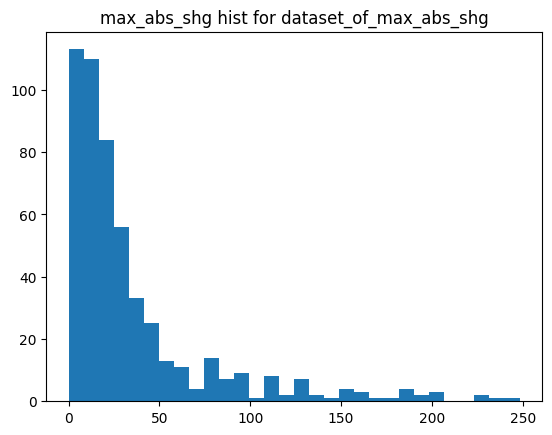

In [3]:
targets_list = [v["shg"] for v in shg_dict.values()]
from matplotlib import pyplot as plt

plt.hist(targets_list, bins=30)
plt.title('max_abs_shg hist for dataset_of_max_abs_shg')